In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

In [2]:
random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.CIFAR10('your path', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=128, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.CIFAR10('your path', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=128, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
class BasicBlock(nn.Module):
    expansion = 1   # Do not change expansion rate

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()

        if stride != 1:
            self.shortcut = 
    
    def forward(self, x):
        return 

In [5]:
class ResNet(nn.Module):
    def __init__(self, block, num_blocks):
        super(ResNet, self).__init__()
        self.in_planes = """???"""

        self.conv1 = nn.Conv2d(in_channels = , out_channels = , kernel_size=,stride=, padding=, bias=False)
        self.bn1 = nn.BatchNorm2d()

        self.linear = nn.Linear("""???""", """???""")

    def forward(self, x):
        return 

In [6]:
def ResNet10():
    return ResNet(BasicBlock, num_blocks = [1, 1, 1, 1])

In [7]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import time

In [8]:
net = ResNet10()
net = net.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr="""???""", momentum=0.9, weight_decay=1e-4)
step_lr_scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=["""???"""], gamma ="""???""")

In [9]:
def train(epoch):
    net.train()
    running_loss = 0 
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if batch_idx % 30 ==29:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * 128, len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))

            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            torch.save(net.state_dict(), './ResNet_model.pth')
            torch.save(optimizer.state_dict(), './ResNet_optimizer.pth')


In [10]:
def test():
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, data in enumerate(test_loader):
            images, labels = data
            images = images.cuda()
            labels = labels.cuda()
            outputs = net(images)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            test_loss += loss.item()
    test_losses.append(test_loss/(batch_idx+1))
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss/(batch_idx+1), correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))
    accuracy.append(100. * correct / len(test_loader.dataset))

In [11]:
epochs = 50
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]
accuracy = []

In [12]:
test()
since = time.time()
for epoch in range(1, epochs + 1):
    train(epoch)
    test()
    step_lr_scheduler.step()
finish = time.time()
print('Training Finished in {}min'.format((finish - since)//60))


Test set: Avg. loss: 2.3023, Accuracy: 1000/10000 (10%)

Train Epoch: 1 [3712/50000 (7%)]	Loss: 1.953540
Train Epoch: 1 [7552/50000 (15%)]	Loss: 1.629006
Train Epoch: 1 [11392/50000 (23%)]	Loss: 1.649939
Train Epoch: 1 [15232/50000 (30%)]	Loss: 1.396057
Train Epoch: 1 [19072/50000 (38%)]	Loss: 1.439666
Train Epoch: 1 [22912/50000 (46%)]	Loss: 1.486813
Train Epoch: 1 [26752/50000 (53%)]	Loss: 1.401228
Train Epoch: 1 [30592/50000 (61%)]	Loss: 1.237988
Train Epoch: 1 [34432/50000 (69%)]	Loss: 1.348435
Train Epoch: 1 [38272/50000 (76%)]	Loss: 1.628033
Train Epoch: 1 [42112/50000 (84%)]	Loss: 1.261019
Train Epoch: 1 [45952/50000 (92%)]	Loss: 1.190255
Train Epoch: 1 [49792/50000 (99%)]	Loss: 1.259668

Test set: Avg. loss: 1.3729, Accuracy: 5228/10000 (52%)

Train Epoch: 2 [3712/50000 (7%)]	Loss: 1.086045
Train Epoch: 2 [7552/50000 (15%)]	Loss: 1.159981
Train Epoch: 2 [11392/50000 (23%)]	Loss: 1.126283
Train Epoch: 2 [15232/50000 (30%)]	Loss: 1.113868
Train Epoch: 2 [19072/50000 (38%)]	Loss:

[]

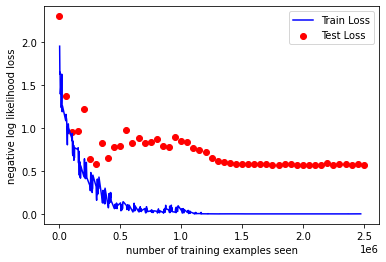

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.plot()

[]

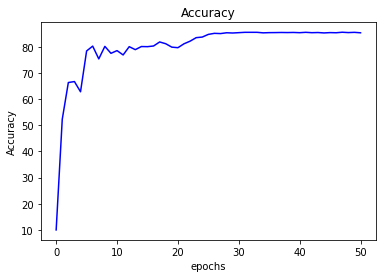

In [14]:
plt.figure()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.plot(range(len(accuracy)), accuracy, color = 'blue')
plt.plot()